In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('seaborn')

In [2]:
#create a random dataset with clusters using sklearn
n_points = 500
X, y = datasets.make_circles(n_samples=n_points, 
                           noise=0.1, 
                           factor=0.2,
                           random_state=2)

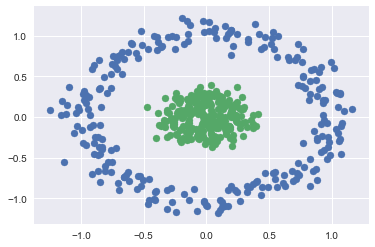

In [3]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])
scatter_plot()

In [4]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

In [10]:
class DNNModel(nn.Module):
    def __init__(self, input_size, hidden_layer1_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, hidden_layer1_size)
        self.linear2 = nn.Linear(hidden_layer1_size, output_size)
        
    def forward(self, x):
        pred1 = torch.sigmoid(self.linear(x))
        output = torch.sigmoid(self.linear2(pred1))
        return output
    
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [11]:
torch.manual_seed(1)
model = DNNModel(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.3643, -0.3121],
        [-0.1371,  0.3319],
        [-0.6657,  0.4241],
        [-0.1455,  0.3597]], requires_grad=True), Parameter containing:
tensor([ 0.0983, -0.0866,  0.1961,  0.0349], requires_grad=True), Parameter containing:
tensor([[ 0.1826, -0.1949, -0.0365, -0.0450]], requires_grad=True), Parameter containing:
tensor([0.0725], requires_grad=True)]


In [12]:
criterion = nn.BCELoss()#Binary Cross Entropy
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [13]:
epochs =1000
losses = []
for i in range(epochs):    
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    if i%100==0:
        print("Epoch {} - Loss {}".format(i, loss.item()))
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    #retain_graph=False to free the back compute and be albe to run multiple times
    optimizer.step()

Epoch 0 - Loss 0.6934542059898376
Epoch 100 - Loss 0.039993710815906525
Epoch 200 - Loss 0.012103421613574028
Epoch 300 - Loss 0.006610369309782982
Epoch 400 - Loss 0.004332616925239563
Epoch 500 - Loss 0.003116420703008771
Epoch 600 - Loss 0.0023739314638078213
Epoch 700 - Loss 0.0018803267739713192
Epoch 800 - Loss 0.00153210642747581
Epoch 900 - Loss 0.0012754929484799504


Text(0.5,0,'epoch')

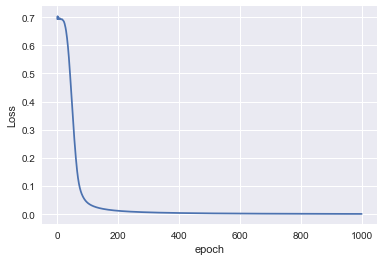

In [14]:
#visualize the gradient descent with Adam convergence
# Adam choose better learning rate during the optimization process
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [25]:
def plot_decision_boundary(X, y):
    x_span = np.linspace(min(X[:, 0]) - .25, max(X[:, 0]) + .25) #min horizontal coord to max horz
    y_span = np.linspace(min(X[:, 1]) - .25, max(X[:, 1]) + .25) #min vertical coord to max vert
    xx, yy = np.meshgrid(x_span, y_span)# square 2d matrix
    #flatten arrays
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)

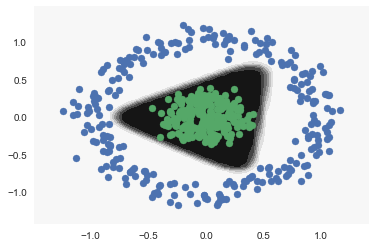

In [26]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction is  1


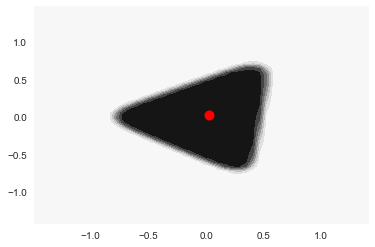

In [29]:
x = 0.025
y = 0.021
point = torch.Tensor([x, y])
pred = model.predict(point)
plot_decision_boundary(X, y)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is ", pred)